In [2]:
import xgboost as xgb
import pandas as pd 

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [3]:
data = pd.read_csv('hypertension_data.csv')

data.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,72.0,0.0,0,138,294,1,1,106,0,1.9,1,3,2,0
26079,60.0,1.0,0,144,200,0,0,126,1,0.9,1,0,3,0
26080,68.0,1.0,0,100,234,0,1,156,0,0.1,2,1,3,0
26081,67.0,1.0,1,154,232,0,0,164,0,0.0,2,1,2,0


In [4]:
num_cols = ['age', 'sex','cp','trestbps','chol','fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca','thal']

num_imputer = SimpleImputer()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_imputer, num_cols)
    ]
)

In [5]:
x = data.drop(columns=['target'])
y = data['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

model = xgb.XGBClassifier(
                     objective='binary:logistic',
                     max_depth=5,
                     n_estimators=100,
                     random_state=42,
                     learning_rate=0.05
                )

In [6]:
data_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

data_pipeline.fit(x_train, y_train)
hypertension_prediction = data_pipeline.predict(x_test)

accuracy = data_pipeline.score(x_test, y_test)

accuracy

1.0

In [7]:
model_metrics = classification_report(y_test, hypertension_prediction)

print(model_metrics)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2358
           1       1.00      1.00      1.00      2859

    accuracy                           1.00      5217
   macro avg       1.00      1.00      1.00      5217
weighted avg       1.00      1.00      1.00      5217



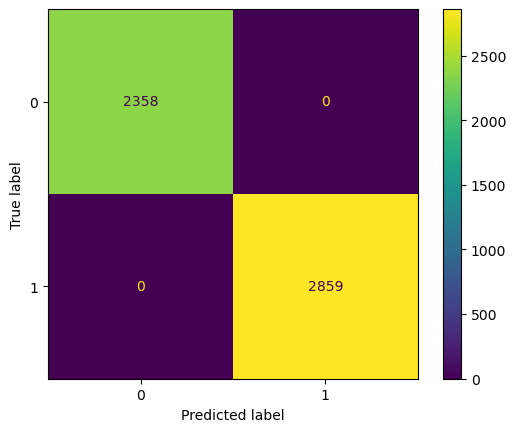

In [8]:
c_matrix = confusion_matrix(y_test, hypertension_prediction)
matrix_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
matrix_display.plot()

In [9]:
cv_score = cross_val_score(data_pipeline, x, y, cv=5, scoring='accuracy')

print(cv_score)
print(f'Average accuracy is {cv_score.mean()}')

[0.99635806 0.99635806 1.         1.         0.9967408 ]
Average accuracy is 0.9978913835843415
